# Comparison of 1st and 2nd order

In [1]:
f = x -> sin( exp(x+1) );
exact_value = cos(exp(1))*exp(1);

We'll run both formulas in parallel for a sequence of $h$ values.

In [2]:
h_ = @. 4. ^(-1:-1:-8)
FD1 = 0*h_;  FD2 = 0*h_;
for (k,h) = enumerate(h_)
    FD1[k] = (f(h) - f(0)) / h
    FD2[k] = (f(h) - f(-h)) / (2*h)
end

In each case $h$ is decreased by a factor of 4, so that the error is reduced by a factor of 4 in the first-order method and 16 in the second-order method.

In [3]:
error_FD1 = @. exact_value-FD1 
error_FD2 = @. exact_value-FD2

using DataFrames
DataFrame(h=h_,error_FD1=error_FD1,error_FD2=error_FD2)

,h,error_FD1,error_FD2
,Float64,Float64,Float64
1,0.25,0.53167,-0.0858972
2,0.0625,0.166752,-0.00444383
3,0.015625,0.042784,-0.000274029
4,0.00390625,0.0107514,-1.71123e-5
5,0.000976562,0.00269113,-1.06946e-6
6,0.000244141,0.000672984,-6.68411e-8
7,6.10352e-5,0.000168259,-4.1767e-9
8,1.52588e-5,4.20654e-5,-2.72689e-10


A graphical comparison can be clearer. On a log-log scale, the error should (roughly) be a straight line whose slope is the order of accuracy. However, it's conventional in convergence plots, to show $h$ _decreasing_ from left to right, which negates the slopes.

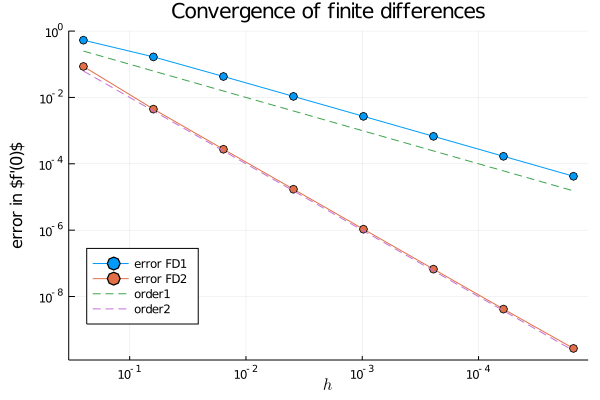

In [4]:
using Plots
plot(h_,[abs.(error_FD1) abs.(error_FD2)],m=:o,label=["error FD1" "error FD2"],
    xflip=true,xaxis=(:log10,"\$h\$"),yaxis=(:log10,"error in \$f'(0)\$"),
    title="Convergence of finite differences",leg=:bottomleft)
plot!(h_,[h_ h_.^2],l=:dash,label=["order1" "order2"])      # perfect 1st and 2nd order